In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Let's import and prep the datasets

data=pd.read_csv('/content/gdrive/MyDrive/SoftCom_Project/input/train.csv', sep=',', encoding='utf-8')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    5888 non-null   object 
 1   label   5887 non-null   object 
 2   target  5887 non-null   float64
dtypes: float64(1), object(2)
memory usage: 138.2+ KB


,text,label,target
0,৭৫ হামলার আসামী কে এই গডফাদার কালা মন্দির?,Personal,0.0
1,রাজাকারদের মন্ত্রী বানানোর দায়ে তার আরও কঠিন ...,Political,1.0
2,বৃটিশ নাগরিকদের বাংলাদেশ ভ্রমনে সতর্কতা জারী ২...,Geopolitical,3.0
3,বলদ নয়াদিগন্ত কালকে রিপোর্ট করলো হিলারী শপথ ন...,Political,1.0
4,অসভ্য বর্বর বেহায়া ভোট ডাকাত সকল প্রকার খারাপ...,Geopolitical,3.0


In [4]:
# splitting the dataset
data_unlabeled = data['text']
len(data_unlabeled)
data_labels = data['label']
data_targets = data['target']
data_unlabeled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5890 entries, 0 to 5889
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
5888 non-null   object
dtypes: object(1)
memory usage: 46.1+ KB


In [5]:
import collections
import plotly.express as px

# Assuming df is your DataFrame with Bengali text
words = []
for text in data['text']:
    # Check if the value is not NaN before attempting to split
    if isinstance(text, str):
        words.extend(text.split())

word_count = collections.Counter(words)
top_words = dict(word_count.most_common(50))

# Create a Plotly bar chart
fig = px.bar(x=list(top_words.keys()), y=list(top_words.values()), labels={'x': 'Words', 'y': 'Frequency'})
fig.update_layout(title_text='Top 50 most used words', title_font_size=18)
fig.show()


<Axes: >

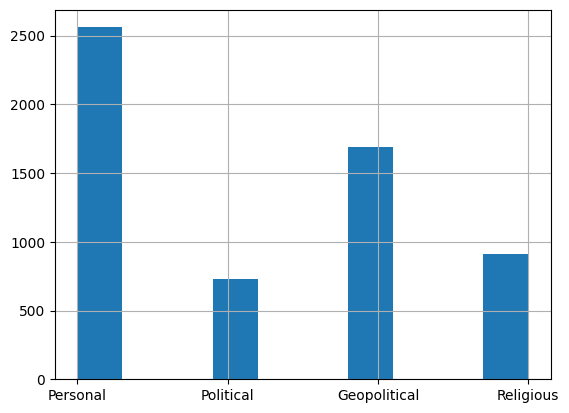

In [ ]:
# a histogram of the values in the data_labels(0,1)
data_labels.hist()

<Axes: >

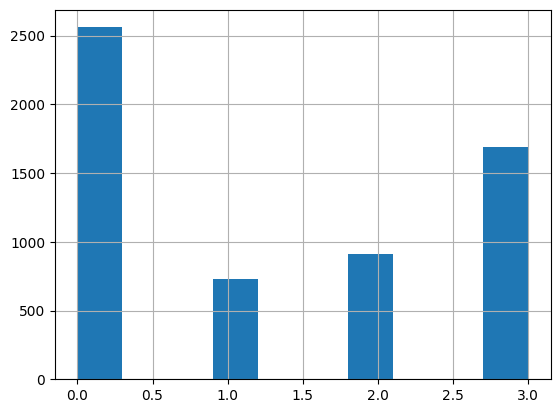

In [ ]:
data_targets.hist()

In [ ]:
print(data_labels.isna().sum())

3


In [ ]:
data_labels = data_labels.dropna()
data_unlabeled = data_unlabeled[data_labels.index]

In [ ]:
print(data_labels.isna().sum())

0


In [ ]:
print(data_targets.isna().sum())

3


In [ ]:
data_targets = data_targets.dropna()
data_unlabeled = data_unlabeled[data_labels.index]

In [ ]:
print(data_targets.isna().sum())

0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import csv
stop_words='/content/gdrive/MyDrive/SoftCom_Project/input/stopwords-bn.txt'
text_data=[]

with open(stop_words,'r',encoding='utf-8') as temp_output_file:
    reader=csv.reader(temp_output_file, delimiter='\n')
    for row in reader:
        text_data.append(row)
stop_word_list=[x[0] for x in text_data]

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

stop_words = set(stop_word_list)

def textCleaner(example_sent):
      if not isinstance(example_sent, str):
         return ''  # or any other value you want to use for non-string input
      word_tokens = word_tokenize(example_sent)
    #filtered_sentence = [w for w in word_tokens if not w in stop_words]
      filtered_train = TreebankWordDetokenizer().detokenize(word_tokens)

      return filtered_train


In [ ]:
filtered_data = data_unlabeled.apply(textCleaner)

In [ ]:
filtered_data

0              ৭৫ হামলার আসামী কে এই গডফাদার কালা মন্দির?
1       রাজাকারদের মন্ত্রী বানানোর দায়ে তার আরও কঠিন ...
2       বৃটিশ নাগরিকদের বাংলাদেশ ভ্রমনে সতর্কতা জারী ২...
3       বলদ নয়াদিগন্ত কালকে রিপোর্ট করলো হিলারী শপথ ন...
4       অসভ্য বর্বর বেহায়া ভোট ডাকাত সকল প্রকার খারাপ...
                              ...                        
5883    কতটা! জানোয়ার হলে দাদা নামের কুলাঙ্গার তার সা...
5884    ঐ শুয়োরের মুখে কোষে দুটা জুতার বারি মার ঐ খান...
5885          তাকে বলে দিও, লিঙ্গ মুখে নিলে বাচ্চা হয় না
5886      হেসে লাভ নাই, এইবার মাইর খাবা। কোন মাফ পাবা না।
5887    মাহি যে ব্যক্তি একটা মেম্বার হওয়ার যোগ্য না ব...
Name: text, Length: 5887, dtype: object

In [ ]:
data_labels.value_counts()

Personal        2561
Geopolitical    1691
Religious        908
Political        727
Name: label, dtype: int64

In [ ]:
data_targets.value_counts()

0.0    2561
3.0    1691
2.0     908
1.0     727
Name: target, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

n=1
ngram_range=(n, n)
vectorizer = TfidfVectorizer(ngram_range=ngram_range)
X = vectorizer.fit_transform(filtered_data)
tfidf_matrix = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
X.shape

(5887, 2149)

In [ ]:
from sklearn import preprocessing
X = preprocessing.normalize(X)
print(X)

  (0, 1568)	0.21881261748963823
  (0, 771)	0.5927652330572553
  (0, 431)	0.22007548723182593
  (0, 230)	0.307570404659013
  (0, 1597)	0.3261089104609906
  (0, 2135)	0.5927652330572553
  (1, 149)	0.33590565057071164
  (1, 643)	0.540677551957528
  (1, 210)	0.5783069584305693
  (1, 1728)	0.42492389146416076
  (1, 1568)	0.2825525208127148
  (2, 1366)	0.32798509609132204
  (2, 1470)	0.16684850733596374
  (2, 1776)	0.3881761043500066
  (2, 139)	0.22106184723997324
  (2, 2093)	0.4235734240059394
  (2, 646)	0.2283324337040222
  (2, 1933)	0.4028673193811788
  (2, 1757)	0.34968283454431937
  (2, 657)	0.2999711837635991
  (2, 810)	0.24274535083921198
  (3, 2028)	0.23225608417086133
  (3, 1768)	0.3352909765242813
  (3, 585)	0.22494997130840083
  (3, 1859)	0.48037494700646977
  :	:
  (5881, 686)	0.1482996648440402
  (5881, 1568)	0.214919317043279
  (5882, 1414)	0.41587837165840796
  (5882, 1890)	0.40413610961574153
  (5882, 651)	0.5157722170764184
  (5882, 1202)	0.2750382819824389
  (5882, 1081)	0.

In [ ]:
print("Number of missing values in X:", X.size - X.count_nonzero())


Number of missing values in X: 0


In [ ]:
print(data_targets.isna().sum())

0


In [ ]:
print("Number of samples in X:", X.getnnz())
print("Number of samples in data_targets:", len(data_targets))



Number of samples in X: 41365
Number of samples in data_targets: 5887


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, data_targets,train_size = 0.8, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

# Helper function to print accuracy, precision, recall, F1 for multi-class classification
def print_metrics(target_test, predicted):
    print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test, predicted)))
    print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted, average='weighted')))
    print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted, average='weighted')))
    print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted, average='weighted')))

# Helper function that allows you to draw nicely formatted confusion matrices for multi-class classification
def draw_confusion_matrix(y, yhat, classes):
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)

    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
print("Number of features in x_train:", x_train.shape[1])
print("Number of features in x_test:", x_test.shape[1])


Number of features in x_train: 2149
Number of features in x_test: 2149


Accuracy:    0.668930
Precision:   0.685213
Recall:      0.668930
F1 Score:    0.648019


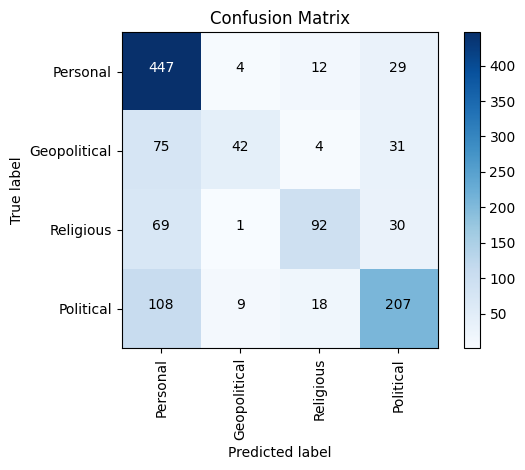

In [ ]:
# fitting the dataset to a logistic regression model
import numpy as np
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2', max_iter=1000)

log_reg.fit(x_train, y_train)
log_predicted = log_reg.predict(x_test)
log_score = log_reg.predict_proba(x_test)[:,1]

print_metrics(y_test, log_predicted)
draw_confusion_matrix(y_test, log_predicted, classes=['Personal', 'Geopolitical', 'Religious', 'Political'])

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

max_features = 2000

# Assuming you have filtered_train and data_labels for your training data
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(filtered_data)
X_tokenized = tokenizer.texts_to_sequences(filtered_data)
X_padded = pad_sequences(X_tokenized)

# Encode labels into categorical format
y_categorical = to_categorical(data_targets, num_classes=4)

# Split the data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=4)


In [ ]:
X_padded.shape

(5887, 85)

In [ ]:
import numpy as np

# Assuming y_categorical is your one-hot encoded labels
class_counts = np.sum(y_categorical, axis=0)

# Print the counts for each class
for i, count in enumerate(class_counts):
    print(f"Class {i + 1}: {count} data points")


Class 1: 2561.0 data points
Class 2: 727.0 data points
Class 3: 908.0 data points
Class 4: 1691.0 data points


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import layers, regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# hyperparameters
embed_vec_size = 120
num_layers = 200
batch_size = 32
learning_rate = 0.0001
dropout_rate = 0.5
reg_strength = 0.005
patience = 10

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embed_vec_size))
model.add(layers.LSTM(num_layers, dropout=dropout_rate, return_sequences=True))
model.add(BatchNormalization())
model.add(layers.LSTM(num_layers, dropout=dropout_rate))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
model.add(Dense(units=4, activation='softmax'))  # Use 'softmax' for multi-class classification

# Compile the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=batch_size,
                 validation_data=(X_test_rnn, y_test_rnn), callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(X_test_rnn, y_test_rnn)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])


Epoch 1/50
148/148 [==============================] - 20s 75ms/step - loss: 2.0990 - accuracy: 0.3177 - val_loss: 1.6928 - val_accuracy: 0.4363
Epoch 2/50
148/148 [==============================] - 5s 36ms/step - loss: 1.8780 - accuracy: 0.3876 - val_loss: 1.6474 - val_accuracy: 0.4363
Epoch 3/50
148/148 [==============================] - 3s 17ms/step - loss: 1.7469 - accuracy: 0.4523 - val_loss: 1.6024 - val_accuracy: 0.4610
Epoch 4/50
148/148 [==============================] - 3s 19ms/step - loss: 1.6437 - accuracy: 0.4916 - val_loss: 1.4915 - val_accuracy: 0.5866
Epoch 5/50
148/148 [==============================] - 4s 26ms/step - loss: 1.5539 - accuracy: 0.5371 - val_loss: 1.3698 - val_accuracy: 0.6197
Epoch 6/50
148/148 [==============================] - 2s 15ms/step - loss: 1.4411 - accuracy: 0.5793 - val_loss: 1.3069 - val_accuracy: 0.6265
Epoch 7/50
148/148 [==============================] - 2s 16ms/step - loss: 1.3696 - accuracy: 0.6031 - val_loss: 1.2029 - val_accuracy: 0.673

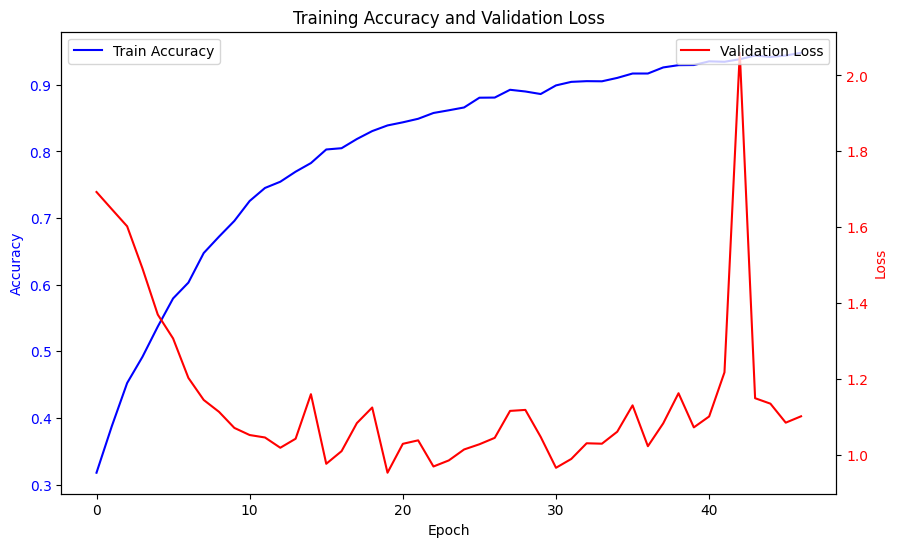

In [ ]:
import matplotlib.pyplot as plt

# Assuming `hist` is the training history obtained during model training

# Plot training accuracy and validation loss on the same graph
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy', color='blue')
plt.tick_params(axis='y', labelcolor='blue')
plt.legend(loc='upper left')

# Create a second y-axis for validation loss
plt.twinx()

# Plot validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss', color='red')
plt.ylabel('Loss', color='red')
plt.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper right')

plt.title('Training Accuracy and Validation Loss')
plt.show()




In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, BatchNormalization, Dropout, LSTM, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# hyperparameters
embed_vec_size = 120
num_layers = 200
batch_size = 32
learning_rate = 0.0001
dropout_rate = 0.5
reg_strength = 0.005
patience = 10

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embed_vec_size))
model.add(Bidirectional(LSTM(num_layers, dropout=dropout_rate, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(num_layers, dropout=dropout_rate)))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
model.add(Dense(units=4, activation='softmax'))  # Use 'softmax' for multi-class classification

# Compile the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=batch_size,
                 validation_data=(X_test_rnn, y_test_rnn), callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(X_test_rnn, y_test_rnn)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])


Epoch 1/50
148/148 [==============================] - 23s 104ms/step - loss: 2.6389 - accuracy: 0.2485 - val_loss: 1.7754 - val_accuracy: 0.4363
Epoch 2/50
148/148 [==============================] - 6s 42ms/step - loss: 2.1327 - accuracy: 0.3478 - val_loss: 1.7314 - val_accuracy: 0.4024
Epoch 3/50
148/148 [==============================] - 5s 33ms/step - loss: 1.9422 - accuracy: 0.4251 - val_loss: 1.6160 - val_accuracy: 0.5280
Epoch 4/50
148/148 [==============================] - 5s 31ms/step - loss: 1.7331 - accuracy: 0.4963 - val_loss: 1.4512 - val_accuracy: 0.6053
Epoch 5/50
148/148 [==============================] - 4s 30ms/step - loss: 1.6137 - accuracy: 0.5466 - val_loss: 1.3659 - val_accuracy: 0.6231
Epoch 6/50
148/148 [==============================] - 5s 32ms/step - loss: 1.4719 - accuracy: 0.6039 - val_loss: 1.3426 - val_accuracy: 0.6426
Epoch 7/50
148/148 [==============================] - 4s 29ms/step - loss: 1.3788 - accuracy: 0.6354 - val_loss: 1.2409 - val_accuracy: 0.70

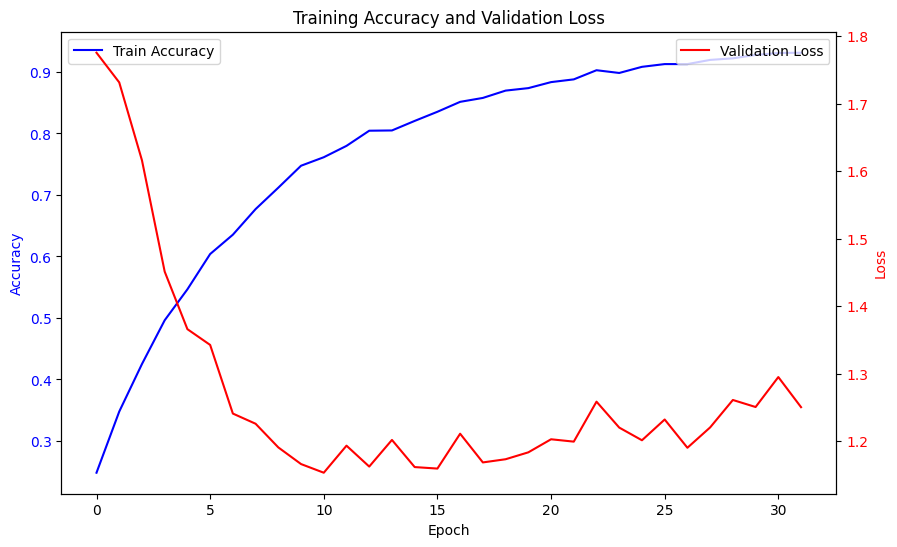

In [ ]:
import matplotlib.pyplot as plt

# Assuming `hist` is the training history obtained during model training

# Plot training accuracy and validation loss on the same graph
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy', color='blue')
plt.tick_params(axis='y', labelcolor='blue')
plt.legend(loc='upper left')

# Create a second y-axis for validation loss
plt.twinx()

# Plot validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss', color='red')
plt.ylabel('Loss', color='red')
plt.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper right')

plt.title('Training Accuracy and Validation Loss')
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, BatchNormalization, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Assuming you have filtered_train and data_labels for your training data
max_features = 2000

# Tokenizing and padding the data for RNN
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(filtered_data)
X_tokenized = tokenizer.texts_to_sequences(filtered_data)
X_padded = pad_sequences(X_tokenized)

# Encode labels into categorical format
y_categorical = to_categorical(data_targets, num_classes=4)

# Split the data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=4)

# hyperparameters
embed_vec_size = 120
num_layers = 200
batch_size = 32
learning_rate = 0.0001
dropout_rate = 0.5
reg_strength = 0.005
patience = 10

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embed_vec_size))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(num_layers, dropout=dropout_rate, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(num_layers, dropout=dropout_rate)))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
model.add(Dense(units=4, activation='softmax'))  # Use 'softmax' for multi-class classification

# Compile the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(X_train_rnn, y_train_rnn, epochs=100, batch_size=batch_size,
                 validation_data=(X_test_rnn, y_test_rnn), callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(X_test_rnn, y_test_rnn)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])


Epoch 1/100
148/148 [==============================] - 23s 89ms/step - loss: 2.1284 - accuracy: 0.3289 - val_loss: 1.7759 - val_accuracy: 0.4363
Epoch 2/100
148/148 [==============================] - 5s 32ms/step - loss: 1.8194 - accuracy: 0.4190 - val_loss: 1.7094 - val_accuracy: 0.4550
Epoch 3/100
148/148 [==============================] - 4s 29ms/step - loss: 1.6794 - accuracy: 0.4859 - val_loss: 1.6216 - val_accuracy: 0.5221
Epoch 4/100
148/148 [==============================] - 3s 24ms/step - loss: 1.5578 - accuracy: 0.5445 - val_loss: 1.4876 - val_accuracy: 0.6019
Epoch 5/100
148/148 [==============================] - 3s 20ms/step - loss: 1.4259 - accuracy: 0.6042 - val_loss: 1.3972 - val_accuracy: 0.6197
Epoch 6/100
148/148 [==============================] - 3s 20ms/step - loss: 1.3151 - accuracy: 0.6449 - val_loss: 1.3270 - val_accuracy: 0.6384
Epoch 7/100
148/148 [==============================] - 3s 23ms/step - loss: 1.2223 - accuracy: 0.6857 - val_loss: 1.2358 - val_accuracy

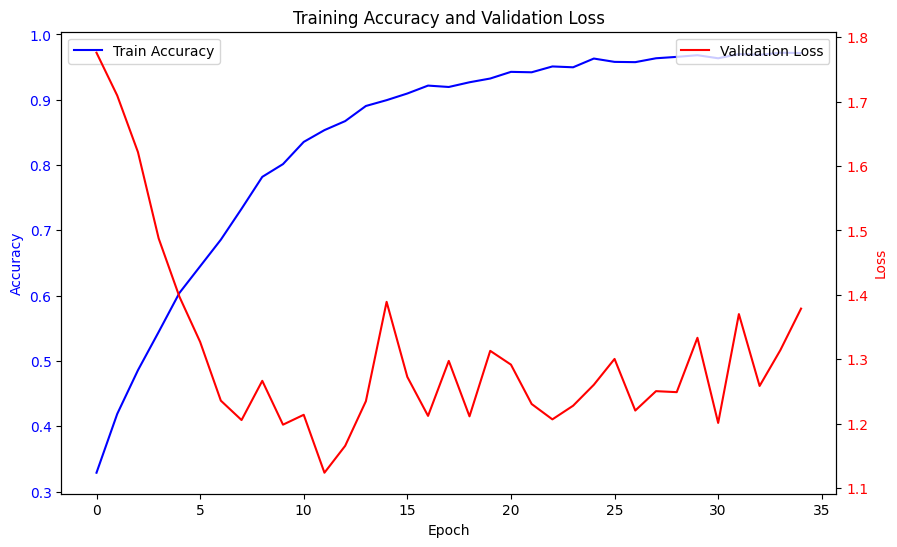

In [ ]:
import matplotlib.pyplot as plt

# Assuming `hist` is the training history obtained during model training

# Plot training accuracy and validation loss on the same graph
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy', color='blue')
plt.tick_params(axis='y', labelcolor='blue')
plt.legend(loc='upper left')

# Create a second y-axis for validation loss
plt.twinx()

# Plot validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss', color='red')
plt.ylabel('Loss', color='red')
plt.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper right')

plt.title('Training Accuracy and Validation Loss')
plt.show()
